# ✅ **Task 4: Social Media Sentiment Analysis)**


### Task Objective

> Analyze and visualize sentiment patterns in social media data—such as Twitter—to understand public opinion and attitudes toward specific topics or brands.

---

### Why the **Twitter Sentiment Dataset**?

* Text data from platforms like Twitter encapsulates **real-time public sentiment**, offering rich insights into reactions, emotions, and brand perception.
* Allows showcasing **NLP preprocessing**, **sentiment scoring**, and **visual storytelling** through charts and word clouds.
* Mirrors real-world applications in marketing, reputation analysis, and policy-making.

---

### What We'll Do in Task 4

1. **Load and inspect** the social media dataset (e.g., tweets with sentiment labels or raw text).
2. **Preprocess** text:

   * Clean (remove URLs, mentions, hashtags, punctuation)
   * Tokenize
   * Remove stop words
   * Normalize (lowercasing, lemmatizing/stemming)
3. **Compute sentiment** using a tool such as **TextBlob**, **VADER**, or other sentiment classifiers.
4. **Aggregate** sentiment results (e.g., count or average sentiment per category/topic).
5. **Visualize**:

   * Sentiment distribution (pie chart or histogram)
   * Average sentiment per topic (bar chart)
   * Additional visuals like **word clouds** for dominant positive and negative terms
6. **Interpret insights**:

   * Identify whether overall sentiment leans positive, negative, or neutral
   * Spot trends or spikes tied to relevant events or topics

---

In [8]:
# Task-04: Social Media Sentiment Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
import os

In [10]:
# Sentiment library
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to C:\Users\Chethan
[nltk_data]     Vakiti\AppData\Roaming\nltk_data...


True

In [16]:
# 1. Load dataset

# Load without header
df = pd.read_csv(r"C:\Users\Chethan Vakiti\Downloads\twitter_training.csv", header=None)

# Assign column names manually (example names)
df.columns = ["id", "topic", "sentiment", "text"]

print("Initial Data:")
df.head()

Initial Data:


,id,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [18]:
df.shape

(74682, 4)

In [20]:
# 2. Text cleaning function
def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r'@\w+|\#', '', text)  # remove mentions & hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # remove special chars/numbers
    text = text.lower().strip()
    return text

# Apply cleaning to the actual text column
df['cleaned_text'] = df['text'].apply(clean_text)


In [22]:
# ----------------------------
# 3. Sentiment Scoring (VADER)
# ----------------------------
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

In [24]:
# ----------------------------
# 4. Save cleaned dataset
# ----------------------------
os.makedirs("sentiment_outputs", exist_ok=True)
df.to_csv("sentiment_outputs/cleaned_sentiment_data.csv", index=False)

C:\Users\Chethan Vakiti\AppData\Local\Temp\ipykernel_26076\2195334631.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


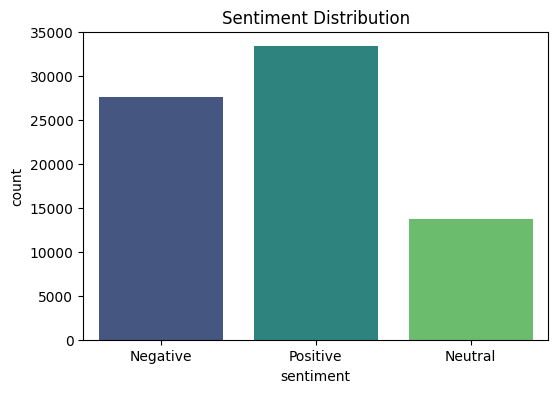

In [26]:
# ----------------------------
# 5. Visualizations
# ----------------------------

# Sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title("Sentiment Distribution")
plt.savefig("sentiment_outputs/sentiment_distribution.png")
plt.show()

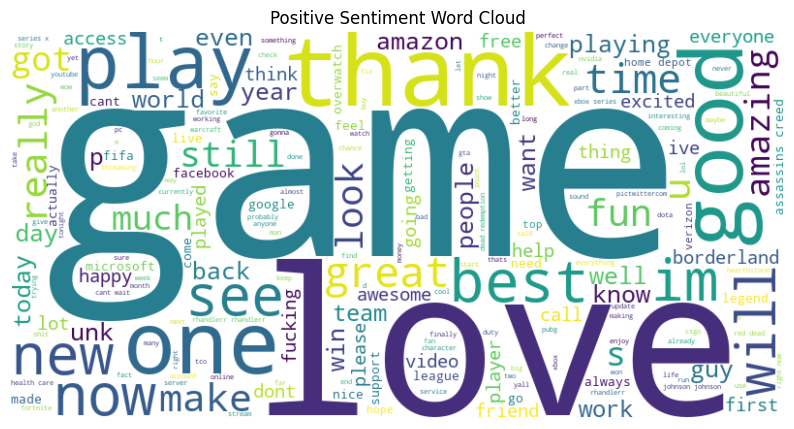

In [28]:
# WordCloud for Positive Sentiment
positive_words = ' '.join(df[df['sentiment'] == 'Positive']['cleaned_text'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(positive_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment Word Cloud")
plt.savefig("sentiment_outputs/wordcloud_positive.png")
plt.show()

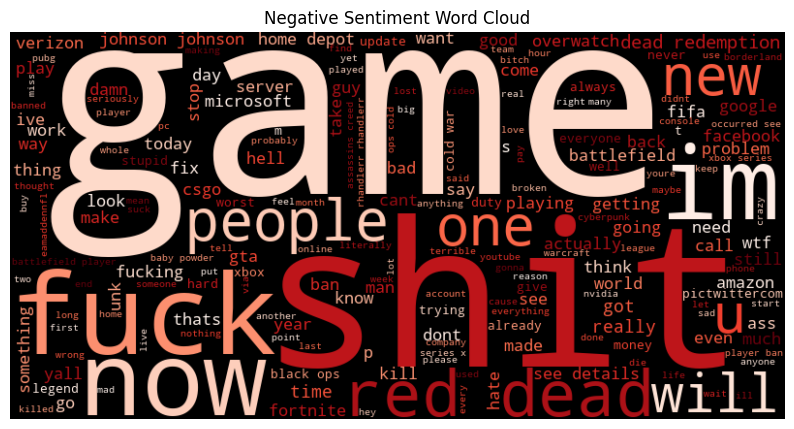

In [30]:
# WordCloud for Negative Sentiment
negative_words = ' '.join(df[df['sentiment'] == 'Negative']['cleaned_text'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', stopwords=STOPWORDS, colormap='Reds').generate(negative_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment Word Cloud")
plt.savefig("sentiment_outputs/wordcloud_negative.png")
plt.show()



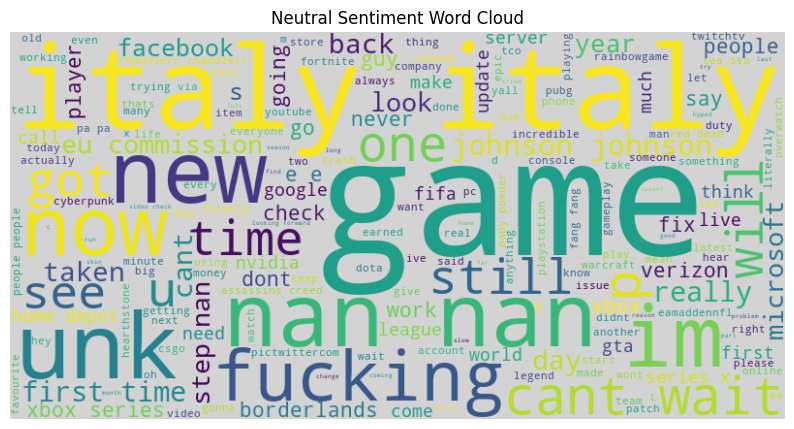

In [36]:
# WordCloud for Neutral Sentiment
neutral_words = ' '.join(df[df['sentiment'] == 'Neutral']['cleaned_text'])
wordcloud_neu = WordCloud(width=800, height=400, background_color='lightgrey', stopwords=STOPWORDS).generate(neutral_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.axis('off')
plt.title("Neutral Sentiment Word Cloud")
plt.savefig("sentiment_outputs/wordcloud_neutral.png")
plt.show()

In [38]:
# ----------------------------
# 6. Insights
# ----------------------------
print("Sentiment Counts:")
print(df['sentiment'].value_counts())

Sentiment Counts:
sentiment
Positive    33341
Negative    27608
Neutral     13733
Name: count, dtype: int64
